In [1]:
import pandas as pd


# PART 1
url= 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df= pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [2]:
cities = ['New York', 'Houston', 'Chicago', 'Los Angeles']
filtered_df = df[df['RegionName'].isin(cities)]

In [3]:
melted= pd.melt(filtered_df,id_vars=['RegionName','Metro','CountyName'])
melted

,RegionName,Metro,CountyName,variable,value
0,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,RegionID,6181
1,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,RegionID,12447
2,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,RegionID,39051
3,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,RegionID,17426
4,Houston,NaN,Chickasaw County,RegionID,18637
...,...,...,...,...,...
3331,Houston,"La Crosse-Onalaska, WI-MN",Houston County,2022-09-30,313318.0
3332,Houston,"Little Rock-North Little Rock-Conway, AR",Perry County,2022-09-30,120552.0
3333,Houston,NaN,Winston County,2022-09-30,309040.0
3334,Houston,"Dover, DE",Kent County,2022-09-30,331738.0


In [5]:
melted = pd.melt(filtered_df.drop(columns=['Metro','CountyName']),
                 id_vars=['RegionName'],
                value_name='Confirmed',var_name="Date")
melted

,RegionName,Date,Confirmed
0,New York,RegionID,6181
1,Los Angeles,RegionID,12447
2,Houston,RegionID,39051
3,Chicago,RegionID,17426
4,Houston,RegionID,18637
...,...,...,...
3331,Houston,2022-09-30,313318.0
3332,Houston,2022-09-30,120552.0
3333,Houston,2022-09-30,309040.0
3334,Houston,2022-09-30,331738.0


In [6]:
melted = melted[~melted['Date'].isin(['RegionID', 'SizeRank','StateName','State','RegionType'])]
melted

,RegionName,Date,Confirmed
60,New York,2000-01-31,253690.0
61,Los Angeles,2000-01-31,234181.0
62,Houston,2000-01-31,109068.0
63,Chicago,2000-01-31,166139.0
64,Houston,2000-01-31,NaN
...,...,...,...
3331,Houston,2022-09-30,313318.0
3332,Houston,2022-09-30,120552.0
3333,Houston,2022-09-30,309040.0
3334,Houston,2022-09-30,331738.0


In [7]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 60 to 3335
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  3276 non-null   object        
 1   Date        3276 non-null   datetime64[ns]
 2   Confirmed   2558 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 102.4+ KB


/var/folders/fc/lxtc0_tj33b65krh167ynf300000gn/T/ipykernel_16058/3951525007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted['Date'] = pd.to_datetime(melted['Date'])


In [8]:
melted= melted.set_index("Date")
melted

,RegionName,Confirmed
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-01-31,Houston,NaN
...,...,...
2022-09-30,Houston,313318.0
2022-09-30,Houston,120552.0
2022-09-30,Houston,309040.0


In [9]:
melted['RegionName'].unique()

array(['New York', 'Los Angeles', 'Houston', 'Chicago'], dtype=object)

In [17]:
df_ts= melted.groupby("RegionName").resample("M").mean()
df_ts

/var/folders/fc/lxtc0_tj33b65krh167ynf300000gn/T/ipykernel_16058/2526973207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts= melted.groupby("RegionName").resample("M").mean()
/var/folders/fc/lxtc0_tj33b65krh167ynf300000gn/T/ipykernel_16058/2526973207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts= melted.groupby("RegionName").resample("M").mean()
/var/folders/fc/lxtc0_tj33b65krh167ynf300000gn/T/ipykernel_16058/2526973207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify n

Confirmed
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

In [18]:
# PART 2

import matplotlib.ticker as mticks

def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

In [19]:
unstacked = df_ts.unstack(level=0)
unstacked

Confirmed                                     
RegionName   Chicago        Houston Los Angeles  New York
Date                                                     
2000-01-31  166139.0   92017.666667    234181.0  253690.0
2000-02-29  166536.0   92125.000000    234401.0  255517.0
2000-03-31  167368.0   92039.333333    235513.0  257207.0
2000-04-30  168826.0   92295.000000    237589.0  260310.0
2000-05-31  170499.0   92540.333333    240113.0  263204.0
...              ...            ...         ...       ...
2022-05-31  312487.0  227220.444444    990391.0  768797.0
2022-06-30  314663.0  229466.333333    992337.0  773944.0
2022-07-31  315910.0  231245.222222    992630.0  777692.0
2022-08-31  315587.0  233010.111111    978196.0  779960.0
2022-09-30  315429.0  234137.777778    966595.0  781622.0

[273 rows x 4 columns]

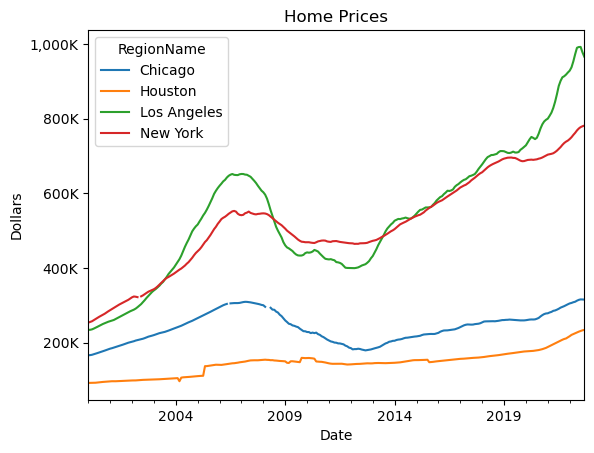

In [20]:
ax = unstacked['Confirmed'].plot()

ax.set_title('Home Prices')
ax.set_ylabel('Dollars')

ax.yaxis.set_major_formatter(fmt_mill)
ax.yaxis.set_major_formatter(fmt_thous)

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

Highest: Los Angeles
Lowest: Houston

In [22]:
#2) How much did the home values change from November 2008 to December 2008 (in dollars)?
df_ts[df_ts['Confirmed'] == 2008].diff().mean()

Confirmed   NaN
dtype: float64